In [9]:
import importlib
importlib.reload(skimage)

<module 'skimage' from 'C:\\Users\\grmc1\\Anaconda3\\lib\\site-packages\\skimage\\__init__.py'>

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes
from PIL import Image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from skimage import color
from skimage import morphology

In [10]:
import skimage
print(skimage.__version__)

0.16.2


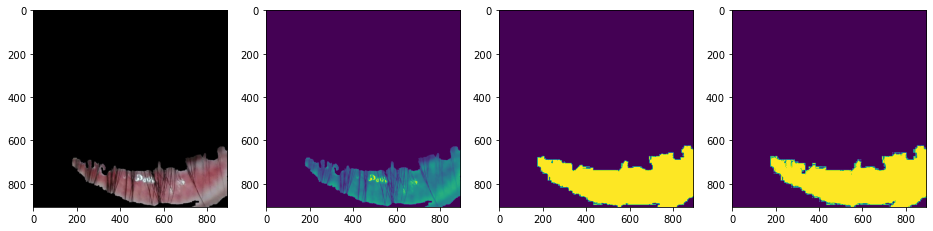

In [3]:
di='D:\\Documentos\\LIIARPI\\Anemia\\Base_de_Datos\\Sem_Auto\\eye_c1anemia-55.jpg'
img = io.imread(di)
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(morphology.remove_small_objects(lum > 0, 500),500)
mask1 = morphology.opening(mask, morphology.disk(3))
mask1=lum>0
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols=4,figsize=(16,4))
ax0.imshow(img)
ax1.imshow(lum)
ax2.imshow(mask)
ax3.imshow(mask1)

(-0.5, 893.5, 905.5, -0.5)

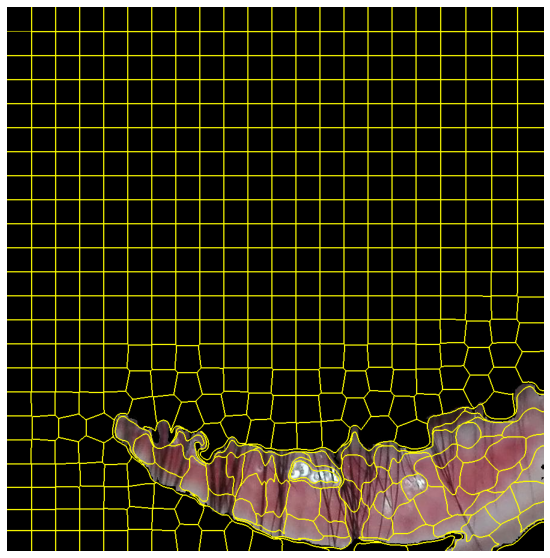

In [4]:
segments = slic(img, n_segments = 500, sigma = 5)
fig = plt.figure("Superpixels -- %d segments" % (500),figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")

In [5]:
#lum = color.rgb2gray(img)
#mask1=lum>0
m_slic = slic(img, n_segments=800,sigma=5,mask=mask1)

fig = plt.figure("Superpixels -- %d segments" % (500),figsize=(30,30))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, m_slic))
plt.axis("off")

TypeError: slic() got an unexpected keyword argument 'mask'

In [23]:
RID=set(m_slic.flatten())
f=np.zeros((img.shape[0],img.shape[1],4))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3]=m_slic

DIRID={i:{'N':0,'RGB':np.zeros((3))} for i in RID}
for i in f:
    for j in i:
        DIRID[j[3]]['RGB']+=j[0:3]
        DIRID[j[3]]['N']+=1
for i in DIRID:
    DIRID[i]['RGB']//=DIRID[i]['N']


In [20]:
RID=set(m_slic.flatten())
f=np.zeros((img.shape[0],img.shape[1],4))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3]=m_slic

DIRID={i:{'U':np.zeros((3)),'X':np.zeros((3))} for i in RID}
indx=np.where(f[:,:,3]==1)
f[indx[0],indx[1],:]

for i in RID:
    indx=np.where(f[:,:,3]==i)
    x=np.mean(f[indx[0],indx[1],:],axis=0)
    u=np.std(f[indx[0],indx[1],:],axis=0)
    DIRID[i]['X']=x[0:3]
    DIRID[i]['U']=u[0:3]

In [21]:
DIRID

{0: {'U': array([0.24616728, 0.2466768 , 0.24545554]),
  'X': array([0.00554991, 0.00570462, 0.0053877 ])},
 1: {'U': array([55.52149737, 54.05378086, 53.4361736 ]),
  'X': array([48.7537092 , 46.62017804, 45.63501484])},
 2: {'U': array([40.65099424, 38.18161738, 37.65224499]),
  'X': array([111.45032719, 103.49256395, 100.52111838])},
 3: {'U': array([62.52151341, 59.95570739, 56.00213443]),
  'X': array([90.01853486, 85.53045013, 79.60458959])},
 4: {'U': array([24.64728589, 24.0772605 , 24.66754719]),
  'X': array([137.41002786, 120.64791086, 122.57827298])},
 5: {'U': array([73.41200327, 71.29012109, 71.84321781]),
  'X': array([57.39748201, 54.70143885, 54.85971223])},
 6: {'U': array([19.28179424, 19.83491825, 19.59274767]),
  'X': array([156.13671498, 143.32995169, 145.39082126])},
 7: {'U': array([6.43189369, 8.16453067, 7.66691144]),
  'X': array([164.76110509, 154.76327194, 155.31852654])},
 8: {'U': array([39.23872453, 40.52690876, 38.24958278]),
  'X': array([123.04213242,

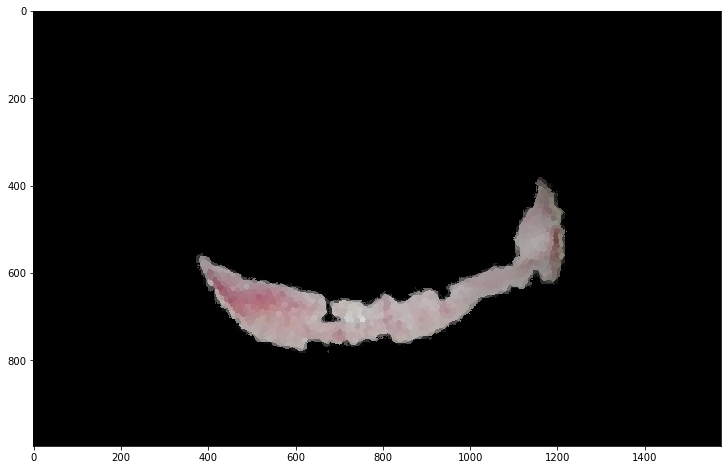

In [24]:
ff=f.copy()
for i in ff:
    for j in i:
        j[0:3]=DIRID[j[3]]['RGB']
t=np.zeros((img.shape[0],img.shape[1],3))
t=ff[:,:,0:3]
ff=t
img2s=Image.fromarray(ff.astype(np.uint8))
img2s
fig, (ax0) = plt.subplots(ncols=1,figsize=(32,8))
ax0.imshow(img2s)

In [ ]:
di='/home/grmc1999/Documentos/LIIARPI/hmg/TempDBR/Processed/Processed/eye_c1anemia-107.jpg'
img = io.imread(di)

def get_X_U(img,n_segments=800)
    lum = color.rgb2gray(img)
    mask1=lum>0

    m_slic = slic(img, n_segments=n_segments,sigma=5,mask=mask1)

    RID=set(m_slic.flatten())
    f=np.zeros((img.shape[0],img.shape[1],4))
    f[:,:,0:3]=img[:,:,0:3]
    f[:,:,3]=m_slic

    DIRID={i:{'U':np.zeros((3)),'X':np.zeros((3))} for i in RID}
    indx=np.where(f[:,:,3]==1)
    f[indx[0],indx[1],:]

    for i in RID:
        indx=np.where(f[:,:,3]==i)
        x=np.mean(f[indx[0],indx[1],:],axis=0)
        u=np.std(f[indx[0],indx[1],:],axis=0)
        DIRID[i]['X']=x
        DIRID[i]['U']=u
    return DIRID